<a href="https://colab.research.google.com/github/tincorpai/Deep_Learning_Pytorch/blob/master/PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Computer Vision Convolutional Neural Networks with PyTorch

Computer vision can be segmented into the following sections:

* Binary Classification

* Multi Classification

* Object detection

* Segmetation

## Things to cover in PyTorch

* Getting a vision dataset to work with using torchvision.datasets

* Architecture of a convolutional neural network (CNN) with PyTorch

* An end-toend multi-class image classification problem 

* Steps in modelling with CNNs in PyTorch

    * Creating a CNN model withPyTorch

    * Picking a loss and optimizer

    * Training a model

    * Evaluating a model.

## Computer Vision Inputs and Outputs

The ways to represent an image in numbers is to use the weight, heaight and channels.

We will represent our images in form of a tensor which will, in many cases, be our input into our machine learning model.


Ensure that your tensor lines up with each other. For instance, our image input can be in form of a list such as `[batch_size, width, height, colour_channels]`

batch_size can be changed depending on the problem you are working on.

Image data can be represented in this form `[batch_size, height, width, colour_channels]` or in this form `[batch_size, colour_channels, height, width]`


We will apply 

## What is Convolutional Neural network?

A convolutional neural network is a deeplearning framework able to take an image as an input and able to categorize each object in an image in order to differentiate one from the other. 

A good resources that give in depth definition of Neural network can be in this link: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

We will be working with Convolutional neural network and the work frame is given as follows:

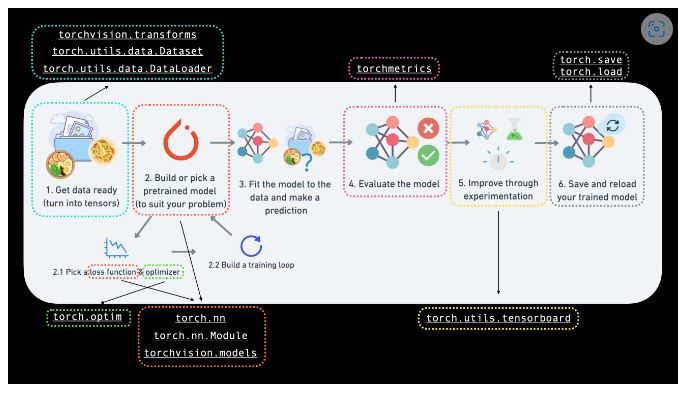

## PyTorch Computer Vision 


*  See reference online book:  https://www.learnpytorch.io/03_pytorch_computer_vision/

### 0. Computer vision libraries in PyTorch

*  [`torchvision`](https://pytorch.org/vision/stable/index.html) - it is the base domain library in PTorch Computer Vision

* [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) - get datasets and data loading functions for computer vision here 

* [`torchvision.models`](https://pytorch.org/vision/0.8/models.html) - get pretrained computer vision models that you can leverage for your own problems.

* [`torchvision.transforms`](https://pytorch.org/vision/0.11/transforms.html) - functions for manipulating your vision data (images) tobe suitable for use with an ML model.

* [`torch.utils.dataDataset`](https://pytorch.org/docs/stable/data.html)- Base dataset class for PyTorch

* [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html) - Creates a Python iterable over a dataset.

In [1]:
# Import PyTorch
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor 


# Import matplotlib for visualization
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


##1. Getting a dataset

The dataset we will be using is FashionMNIST fro torchvision.datasets-
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to download the datset
    train=True,   # do we want the training dataset?
    download=True, # do we wnat to download yes/no?
    transform=torchvision.transforms.ToTensor(), #how do we wnat to transform the data
    target_transform=None  #how do want to download the labels/targets
)


test_data = datasets.FashionMNIST(
    root="data", 
    train=False,   
    download=True, 
    transform=torchvision.transforms.ToTensor(), 
    target_transform=None  
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the fist train example 
image, label = train_data[0]


In [5]:
class_names = train_data.classes
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"image shape:{image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

image shape:torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Our input shape format for this dataset is `[None, 1, 28, 28]` and output shape is 10.

### 1.2 Visualizing our data

image shape: torch.Size([1, 28, 28])


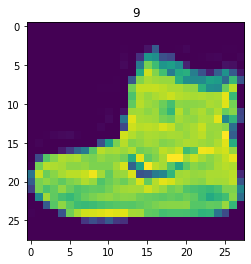

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

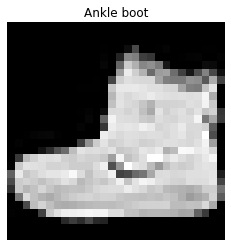

In [10]:
plt.imshow(image.squeeze(), cmap ="gray")
plt.title(class_names[label]);
plt.axis(False);

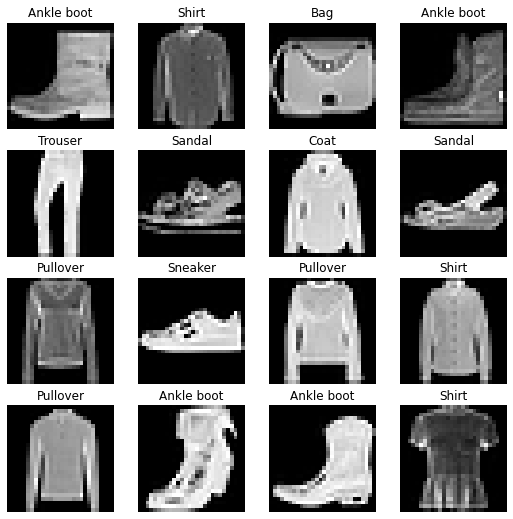

In [11]:
#Visualize multiple images at a time
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

## 2. Prepare DataLoader

We want to convert our dataset, which is in form of collection of our dataset, into a data loader 

A dataLoader turns our dataset into a Python iterable.

Categorically, we want to turn our data into batches (or mini-batches).

Why is this important?

1. It is more compuationalally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradients per epoch.

For more on mini-batches, see here: https://www.youtube.com/watch?v=l4lSUAcvHFs&t=9s

In [12]:
from torch.utils.data import DataLoader

#Set up the batch size hyperparameter 
BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE, 
                               shuffle=True)
                    

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f36bd991d60>,
 <torch.utils.data.dataloader.DataLoader at 0x7f36bd991880>)

In [13]:
#Let's check out what we've created.
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}..")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7f36bd991d60>, <torch.utils.data.dataloader.DataLoader object at 0x7f36bd991880>)
Length of train_dataloader: 1875 batches of 32..
Length of test_dataloader: 313 batches of 32...


In [14]:
#Get the shape of each 32 batches
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


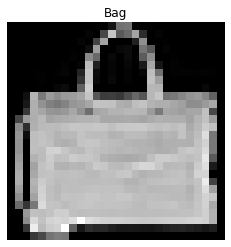

In [15]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline mode

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary.

In [16]:
# Create a flaten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x)   #perform forward pass


#print out
print(f"shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"shape after flattening: {output.shape} -> [color_channels, height*width]")

shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


This means we have one value per pissel in our training vector.

In [17]:
from torch import nn
class FashiionMNISTModelVO(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
        )
  
  def forward(self, x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FashiionMNISTModelVO(
    input_shape=784, # this is 28*28
    hidden_units=10,  #how many units in the hidden layer
    output_shape=len(class_names)  # one for every class
).to("cpu")

model_0

FashiionMNISTModelVO(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

The main premise of machine learning is to pass our data through a model and make use of our optimizer to update the random values generated by our initial model to bethe tter represent features in our data. Features in our images could mean anything.

We are going to tell our model what features to learn about our data. The moel figures out what features to learn.

### 3.1 Set up loss, optimizer and evaluation metrics

*  Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer - out optimizer `torch.optim.SGD()` (Stochastic Gradient Descent)

* Evaluation metric - Since we're working on a classification problem let's use accuracy as our evaluation metrics.

In [20]:
#Gets help function
import requests 
from pathlib import Path


#Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


In [23]:
# Import accuracy metric 
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiment


Tow of the main things you'll often want to track are:

1. Model's peformance (loss and accuracy values etc.)

2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:3f} seconds")
  return total_time
  


In [26]:
start_time = timer()
# Insert some code here

end_time = timer()
print_train_time(start=start_time, end=end_time, device = "cpu") #This returns the time of the code running

Train time on cpu: 0.000030 seconds


2.9736999749729875e-05

### 3.3 Creating a training loop and training a model on  batches of data...



*  Loop through epochs.

*  Loop through training batches, perform training steps, calculate the train loss **per batch**

*  Print out what's happening behind the loop

*  Time it all 

In [34]:
# import tqdm  -> gives us how many epochs our training loop has gone through
from tqdm.auto import tqdm

#Set the seed and start the timer
torch .manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### training
  train_loss = 0
  #Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass 
    y_pred = model_0(X)

    #2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss

    #3. Optimizer zero grad 
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #. Optimizer steps
    optimizer.step()


    #Print out what's happening 
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  #Divide total train loss by length of train dataloader -> return average loss per epoch
  train_loss /= len(train_dataloader)


  ### Testing 
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass 
    test_pred = model_0(X_test)

    #2. Calculate loss (accumulatively)
    test_loss += loss_fn(test_pred, y_test)

    #3. Calculate the accuracy
    test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) #This returns the true class of our sample.

    #4. Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    #Claculate the test acc average per batch
    test_acc /= len(test_dataloader)

  #Print out what's happening
  print(f"\nTain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


#Calulate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


NameError: ignored

In [33]:
str(next(model_0.parameters()).device)

'cpu'